# Dynamic Risk Budgeting

In [2]:
import pandas as pd
import numpy as np
import edhec_risk_kit as erk
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
n_scenarios = 5000
rates, zc_prices = erk.cir(10, n_scenarios=n_scenarios, b=.03, r_0=.03, sigma=.02)
price_eq = erk.gbm(n_years=10, n_scenarios=n_scenarios, mu=.07, sigma=.15)

In [4]:
rets_eq = price_eq.pct_change().dropna()
rets_zc = zc_prices.pct_change().dropna()
rets_7030b = erk.bt_mix(rets_eq, rets_zc, allocator=erk.fixedmix_allocator, w1=.7)
pd.concat([erk.terminal_stats(rets_zc, name="ZC", floor=.75),
           erk.terminal_stats(rets_eq, name="Eq", floor=.75),
           erk.terminal_stats(rets_7030b, name="Z70/30", floor=.75)],
           axis='columns').round(2)

,ZC,Eq,Z70/30
mean,1.34,1.97,1.76
std,0.00,0.97,0.59
p_breach,NaN,0.03,0.01
e_short,NaN,0.14,0.08
p_reach,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN


In [11]:
rets_floor75 = erk.bt_mix(rets_eq, rets_zc, allocator=erk.floor_allocator, floor=.75, zc_prices=zc_prices[1:])
pd.concat([erk.terminal_stats(rets_zc, name="ZC", floor=.75),
           erk.terminal_stats(rets_eq, name="Eq", floor=.75),
           erk.terminal_stats(rets_7030b, name="Z70/30", floor=.75),
           erk.terminal_stats(rets_floor75, name="Floor75", floor=.75)
          ],
           axis='columns').round(2)

,ZC,Eq,Z70/30,Floor75
mean,1.34,1.97,1.76,1.95
std,0.00,0.97,0.59,0.97
p_breach,NaN,0.03,0.01,NaN
e_short,NaN,0.14,0.08,NaN
p_reach,NaN,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN,NaN


In [12]:
rets_floor75m1 = erk.bt_mix(rets_eq, rets_zc, allocator=erk.floor_allocator, floor=.75, zc_prices=zc_prices[1:], m=1)
rets_floor75m5 = erk.bt_mix(rets_eq, rets_zc, allocator=erk.floor_allocator, floor=.75, zc_prices=zc_prices[1:], m=5)
pd.concat([erk.terminal_stats(rets_zc, name="ZC", floor=.75),
           erk.terminal_stats(rets_eq, name="Eq", floor=.75),
           erk.terminal_stats(rets_7030b, name="Z70/30", floor=.75),
           erk.terminal_stats(rets_floor75, name="Floor75", floor=.75),
           erk.terminal_stats(rets_floor75m1, name="Floor75m1", floor=.75),
           erk.terminal_stats(rets_floor75m5, name="Floor75m5", floor=.75)
          ],
           axis='columns').round(2)

,ZC,Eq,Z70/30,Floor75,Floor75m1,Floor75m5
mean,1.34,1.97,1.76,1.95,1.62,1.96
std,0.00,0.97,0.59,0.97,0.43,0.97
p_breach,NaN,0.03,0.01,NaN,NaN,0.00
e_short,NaN,0.14,0.08,NaN,NaN,0.00
p_reach,NaN,NaN,NaN,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
pd.concat([erk.terminal_stats(rets_zc, name="ZC", floor=.75),
           erk.terminal_stats(rets_eq, name="Eq", floor=.75),
           erk.terminal_stats(rets_7030b, name="Z70/30", floor=.75),
           erk.terminal_stats(rets_floor75, name="Floor75", floor=.75),
           erk.terminal_stats(rets_floor75m1, name="Floor75m1", floor=.75),
           erk.terminal_stats(rets_floor75m5, name="Floor75m5", floor=.75)
          ],
           axis='columns').round(4)

,ZC,Eq,Z70/30,Floor75,Floor75m1,Floor75m5
mean,1.3433,1.9688,1.7573,1.9460,1.6215,1.9560
std,0.0000,0.9666,0.5877,0.9716,0.4266,0.9739
p_breach,NaN,0.0322,0.0090,NaN,NaN,0.0002
e_short,NaN,0.1380,0.0783,NaN,NaN,0.0016
p_reach,NaN,NaN,NaN,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN,NaN,NaN,NaN


# Risk Budgeting with Drawdown Constraints

In [14]:
cashrate = .02
monthly_cashreturn = (1+cashrate)**(1/12) - 1
rets_cash = pd.DataFrame(data=monthly_cashreturn, index=rets_eq.index, columns=rets_eq.columns)
rets_maxdd25 = erk.bt_mix(rets_eq, rets_cash, allocator=erk.drawdown_allocator, maxdd=.25)
tv_maxdd25 = erk.terminal_values(rets_maxdd25)
pd.concat([erk.terminal_stats(rets_zc, name="ZC", floor=.75),
           erk.terminal_stats(rets_eq, name="Eq", floor=.75),
           erk.terminal_stats(rets_7030b, name="Z70/30", floor=.75),
           erk.terminal_stats(rets_floor75, name="Floor75", floor=.75),
           erk.terminal_stats(rets_floor75m1, name="Floor75m1", floor=.75),
           erk.terminal_stats(rets_floor75m5, name="Floor75m5", floor=.75),
           erk.terminal_stats(rets_maxdd25, name="MaxDD25", floor=.75)
          ],
           axis='columns').round(4)

,ZC,Eq,Z70/30,Floor75,Floor75m1,Floor75m5,MaxDD25
mean,1.3433,1.9688,1.7573,1.9460,1.6215,1.9560,1.6291
std,0.0000,0.9666,0.5877,0.9716,0.4266,0.9739,0.5323
p_breach,NaN,0.0322,0.0090,NaN,NaN,0.0002,NaN
e_short,NaN,0.1380,0.0783,NaN,NaN,0.0016,NaN
p_reach,NaN,NaN,NaN,NaN,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
erk.summary_stats(rets_maxdd25)["Max Drawdown"]

0      -0.170791
1      -0.124354
2      -0.088988
3      -0.198215
4      -0.159625
          ...   
4995   -0.175822
4996   -0.178912
4997   -0.130331
4998   -0.126761
4999   -0.157705
Name: Max Drawdown, Length: 5000, dtype: float64

In [16]:
erk.summary_stats(rets_maxdd25)["Max Drawdown"].min()

-0.23679996066602677

/Users/jihoon/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jihoon/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jihoon/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

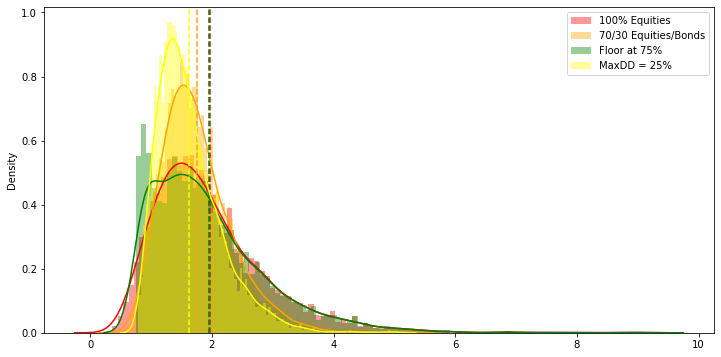

In [18]:
tv_eq = erk.terminal_values(rets_eq)
tv_zc = erk.terminal_values(rets_zc)
tv_7030b = erk.terminal_values(rets_7030b)
tv_floor75 = erk.terminal_values(rets_floor75)
tv_maxdd = erk.terminal_values(rets_maxdd25)
#Plot
plt.figure(figsize=(12,6))
sns.distplot(tv_eq, color='red', label='100% Equities', bins=100)
plt.axvline(tv_eq.mean(), ls='--', color='red')
sns.distplot(tv_7030b, color='orange', label='70/30 Equities/Bonds', bins=100)
plt.axvline(tv_7030b.mean(), ls='--', color='orange')
sns.distplot(tv_floor75, color='green', label='Floor at 75%', bins=100)
plt.axvline(tv_floor75.mean(), ls='--', color='green')
sns.distplot(tv_maxdd25, color='yellow', label='MaxDD = 25%', bins=100)
plt.axvline(tv_maxdd25.mean(), ls='--', color='yellow')
plt.legend();

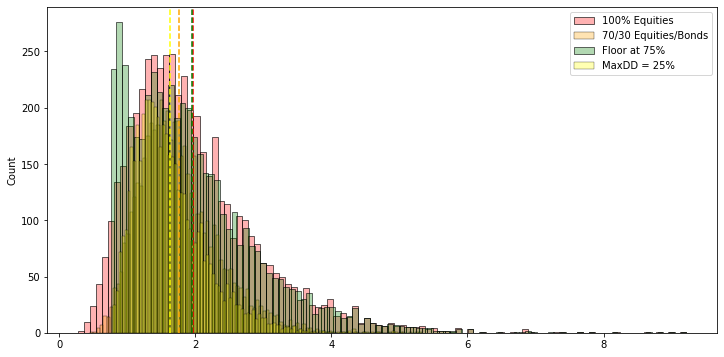

In [24]:
plt.figure(figsize=(12,6))
sns.histplot(tv_eq, color='red', label='100% Equities', bins=100, alpha=0.3)
plt.axvline(tv_eq.mean(), ls='--', color='red')
sns.histplot(tv_7030b, color='orange', label='70/30 Equities/Bonds', bins=100, alpha=0.3)
plt.axvline(tv_7030b.mean(), ls='--', color='orange')
sns.histplot(tv_floor75, color='green', label='Floor at 75%', bins=100, alpha=0.3)
plt.axvline(tv_floor75.mean(), ls='--', color='green')
sns.histplot(tv_maxdd25, color='yellow', label='MaxDD = 25%', bins=100, alpha=0.3)
plt.axvline(tv_maxdd25.mean(), ls='--', color='yellow')
plt.legend();

# Drawdown constraint with Historical Data

<AxesSubplot:>

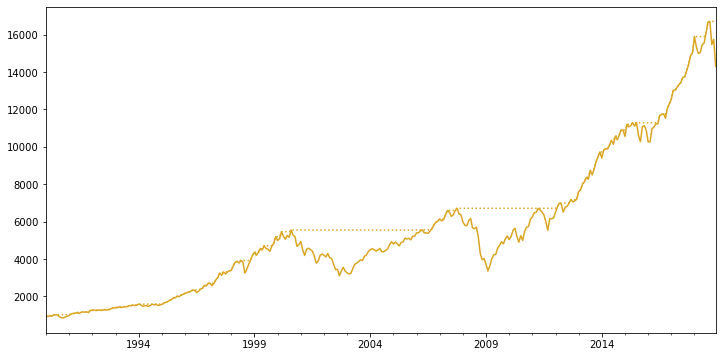

In [27]:
rets_tmi = erk.get_total_market_index_returns()["1990":]
dd_tmi = erk.drawdown(rets_tmi)
ax = dd_tmi["Wealth"].plot(figsize=(12,6), ls='-', color='goldenrod')
dd_tmi["Peaks"].plot(ax=ax, ls=':', color='goldenrod')

<AxesSubplot:>

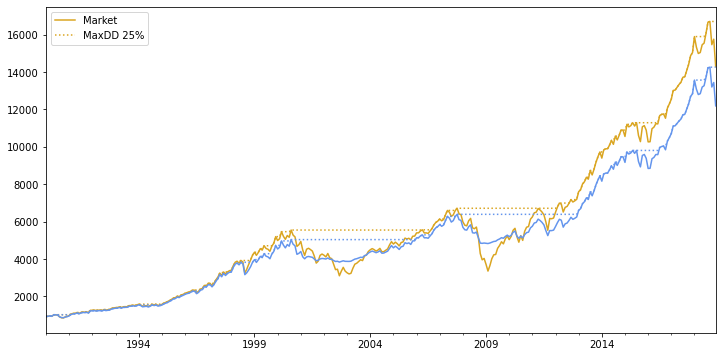

In [32]:
cashrate = .03
monthly_cashreturn = (1+cashrate)**(1/12) - 1
rets_cash = pd.DataFrame(data=monthly_cashreturn, index=rets_tmi.index, columns=[0])
rets_maxdd25 = erk.bt_mix(pd.DataFrame(rets_tmi), rets_cash, allocator=erk.drawdown_allocator, maxdd=.25, m=5)
dd_25 = erk.drawdown(rets_maxdd25[0])
ax = dd_tmi["Wealth"].plot(figsize=(12,6), ls='-', color='goldenrod', label = 'Market', legend=True)
dd_tmi["Peaks"].plot(ax=ax, ls=':', color='goldenrod')
dd_25["Wealth"].plot(ax=ax, label="MaxDD 25%", color="cornflowerblue", legend=True)
dd_25["Peaks"].plot(ax=ax, color='cornflowerblue', ls=":")

In [33]:
erk.summary_stats(pd.concat([rets_tmi.rename("Market"), rets_maxdd25[0].rename("MaxDD")], axis="columns"))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR,Sharpe Ratio,Max Drawdown
Market,0.096058,0.145419,-0.668827,4.247282,0.066949,0.094633,0.441951,-0.499943
MaxDD,0.090062,0.112755,-0.630463,5.015334,0.049978,0.071074,0.518327,-0.244212
